<a href="https://colab.research.google.com/github/ikiakmal15/TI11_RIFQ_0110224225/blob/main/praktkum05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/praktikum 05/data/stunting_wasting_dataset.csv"

In [ ]:
import pandas as pd

df = pd.read_csv(path)
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


Pustaka program decision tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loading dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


Cek missing value

In [ ]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


Cek duplikat

In [ ]:

df.duplicated().sum()

np.int64(7308)

Menghapus data duplikat

In [ ]:
df = df.drop_duplicates()

Cek duplikat ulang setelah menghapus

In [ ]:
df.duplicated().sum()

np.int64(0)

Mengubah nama kolom

In [ ]:
df = df.rename(columns={
    'Jenis kelamin':'jenis_kelamin',
    'Umur (bulan)' : 'umur_bulan',
    'Tinggi Badan (cm)':'tinggi_cm',
    'Berat Badan (kg)':'berat_kg',
    'Stunting':'stunting',
    'Wasting':'wasting'
})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jenis Kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


Data understanding

<function matplotlib.pyplot.show(close=None, block=None)>

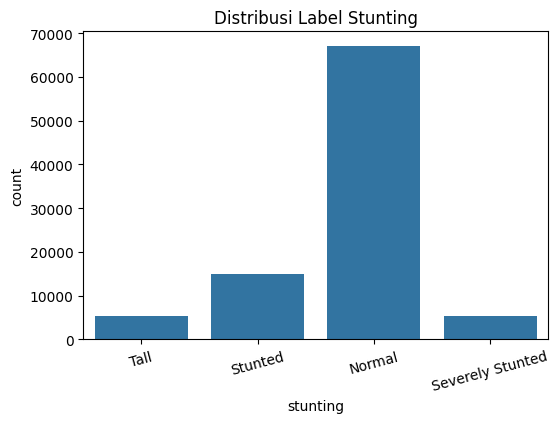

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi Label Stunting')
plt.xticks(rotation=15)
plt.show

Encoding data kategorikal

In [ ]:
#mapping label
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)
df['stunting'] = stunting_cat.cat.codes

#fitur kategorikal lain
for col in ['jenis_kelamin', 'wasting']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes
df.head()

,Jenis Kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,Laki-laki,19,91.6,13.3,3,1
1,Laki-laki,20,77.7,8.5,2,3
2,Laki-laki,10,79.0,10.3,0,1
3,Perempuan,2,50.3,8.3,1,1
4,Perempuan,5,56.4,10.9,1,1


Analisis korelasi antar fitur

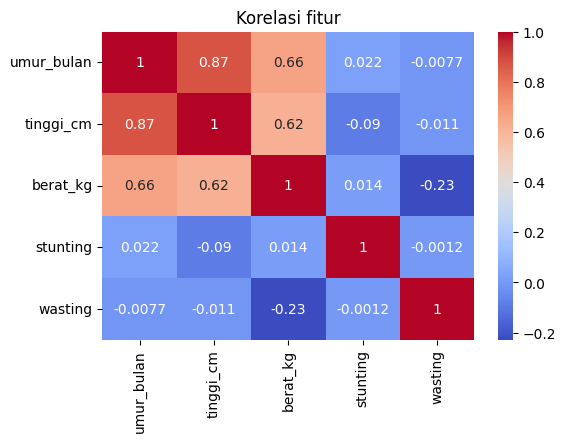

In [ ]:
plt.figure(figsize=(6,4))
# Drop the original 'Jenis Kelamin' column before calculating correlation
sns.heatmap(df.drop('Jenis Kelamin', axis=1).corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi fitur')
plt.show()

Splitting data

In [ ]:
#Memilih fitur dan target
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'wasting']
x = df[feature_cols]
y = df['stunting']

#Membagi dataset
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(x_train), len(x_test)

(74153, 18539)

Pembuatann model decision tree

In [ ]:
#Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Evaluasi model decision tree

In [ ]:
# Evaluasi
y_pred = dt.predict(x_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=stunting_classes
))

Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]

Classification Report:
                   precision    recall  f1-score   support

          Normal       0.80      0.96      0.88     13411
Severely Stunted       1.00      0.02      0.05      1067
         Stunted       0.59      0.45      0.51      3008
            Tall       0.80      0.11      0.20      1053

        accuracy                           0.78     18539
       macro avg       0.80      0.39      0.41     18539
    weighted avg       0.78      0.78      0.73     18539



Visualisasi hasil model decision tree

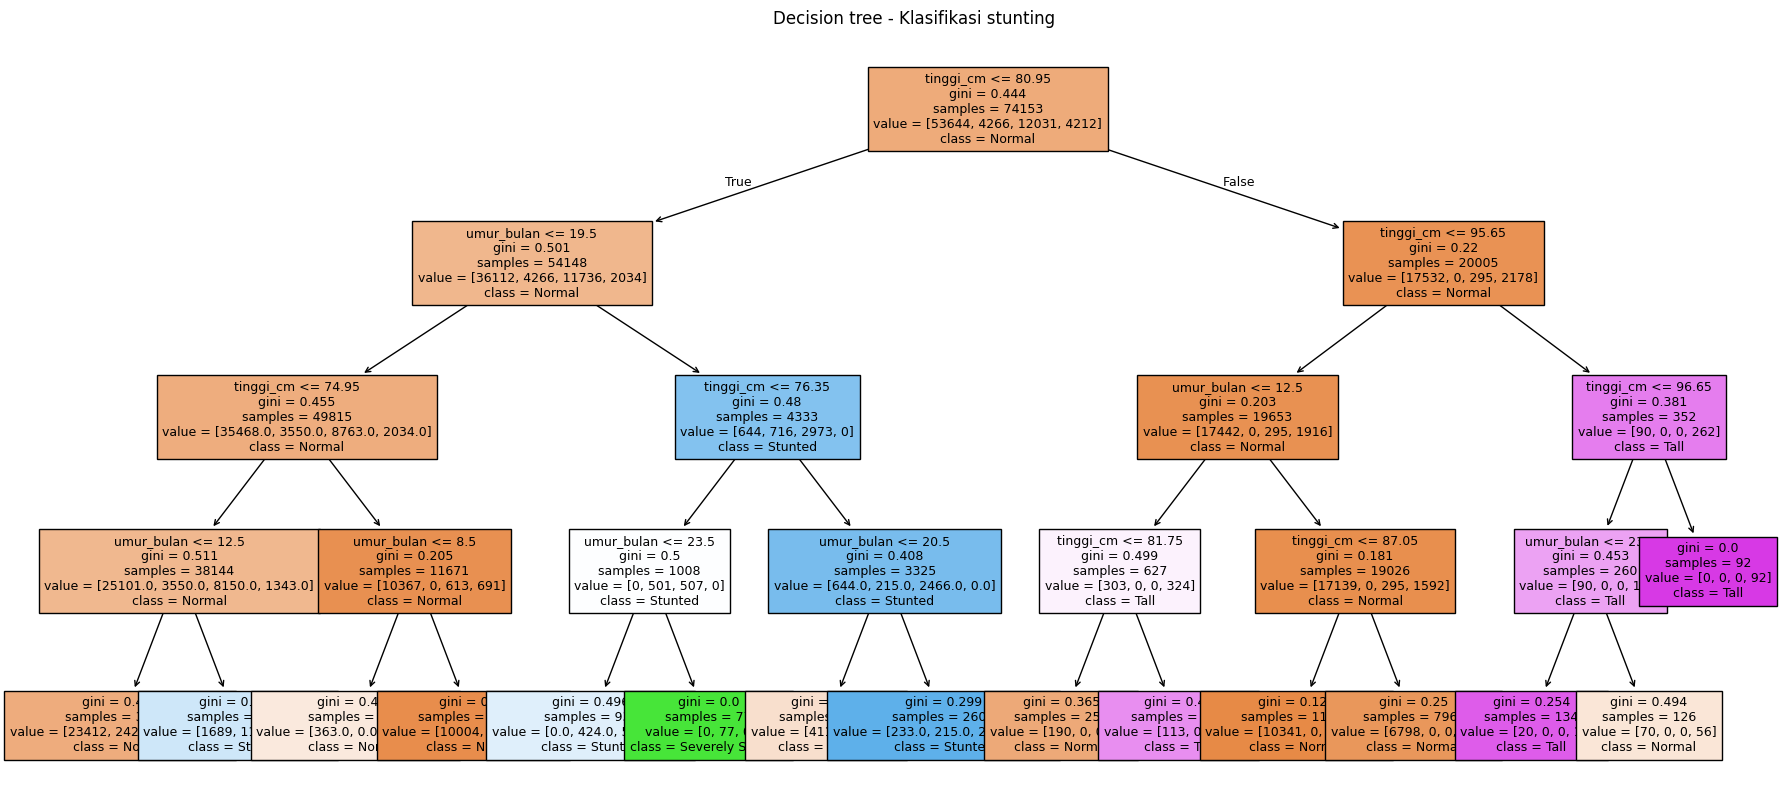

In [ ]:
#visualisasi model
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=stunting_classes,
    filled=True,
    fontsize=9
)
plt.title('Decision tree - Klasifikasi stunting')
plt.show()

Feature importance

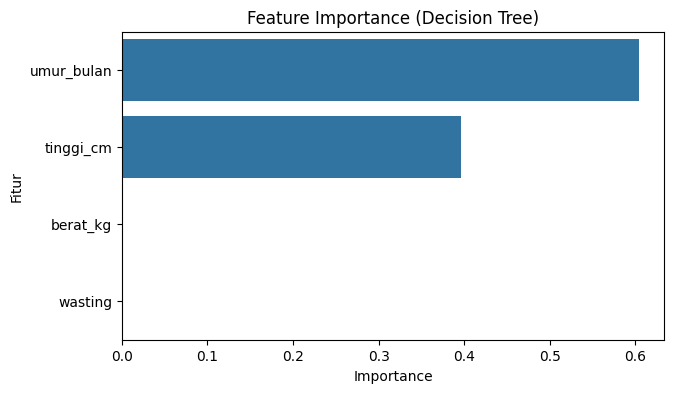

,0
umur_bulan,0.603752
tinggi_cm,0.396248
berat_kg,0.000000
wasting,0.000000


In [ ]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp


Hyperparameter tuning

In [ ]:
scores = {}
for d in range(2, 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(x_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(x_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d] * 100, 2), "%")


Best max_depth: 8 | Acc: 84.22 %


TUGAS MANDIRI

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/praktikum 05/data/Iris.csv"

In [3]:
import pandas as pd

df = pd.read_csv(path)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


IMPORT LIBRARY


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [5]:
print("--- Info Awal ---")
df.info()

print("\n--- Cek Missing Values ---")
print(df.isnull().sum())

print("\n--- Cek Duplikat ---")
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

# Hapus duplikat jika ada
df = df.drop_duplicates()

# Hapus kolom 'Id' karena tidak relevan untuk klasifikasi
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

print("\n--- Data Setelah Cleaning (5 Baris Pertama) ---")
print(df.head())

--- Info Awal ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

--- Cek Missing Values ---
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

--- Cek Duplikat ---
Jumlah data duplikat: 0

--- Data Setelah Cleaning (5 Baris Pertama) ---
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-se

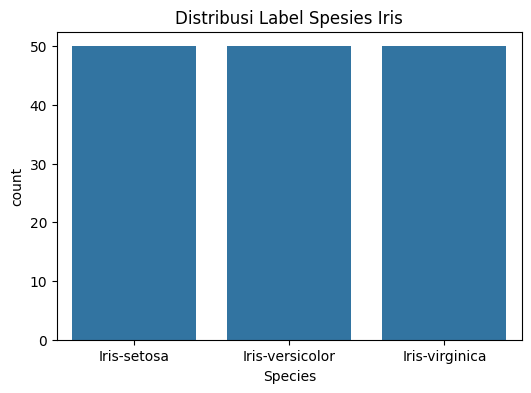

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=df)
plt.title('Distribusi Label Spesies Iris')
plt.show()

In [7]:
# Buat LabelEncoder
label_encoder = LabelEncoder()

# Ubah target 'Species' menjadi angka
# Kita buat kolom baru 'Species_encoded' agar kolom asli tetap ada
df['Species_encoded'] = label_encoder.fit_transform(df['Species'])

# Simpan nama asli spesies untuk laporan dan visualisasi
species_names = label_encoder.classes_

print("--- Nama Kelas (Mapping) ---")
for i, name in enumerate(species_names):
    print(f"{i}: {name}")

print("\n--- Data Setelah Encoding (5 Baris Pertama) ---")
print(df.head())

--- Nama Kelas (Mapping) ---
0: Iris-setosa
1: Iris-versicolor
2: Iris-virginica

--- Data Setelah Encoding (5 Baris Pertama) ---
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   Species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


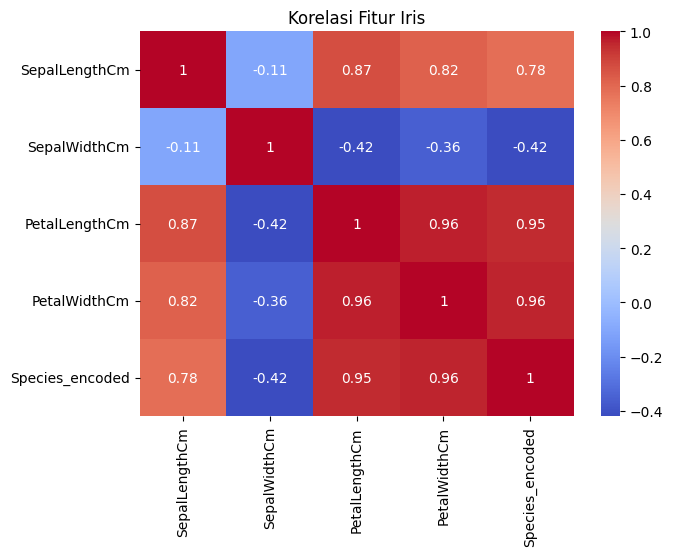

In [8]:
plt.figure(figsize=(7,5))
# Kita drop kolom 'Species' (teks) sebelum menghitung korelasi
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Iris')
plt.show()

In [9]:
# Memilih fitur
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_cols]

# Memilih target (kolom yang sudah di-encode)
y = df['Species_encoded']

print("--- Fitur (X) ---")
print(X.head())
print("\n--- Target (y) ---")
print(y.head())

--- Fitur (X) ---
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

--- Target (y) ---
0    0
1    0
2    0
3    0
4    0
Name: Species_encoded, dtype: int64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 20% untuk data uji
    random_state=42,  # Agar hasil konsisten
    stratify=y        # Menjaga proporsi kelas
)

print(f"Ukuran data training: {len(X_train)}")
print(f"Ukuran data testing: {len(X_test)}")

Ukuran data training: 120
Ukuran data testing: 30


In [11]:
# Membangun model
dt_model_awal = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

# Melatih model
dt_model_awal.fit(X_train, y_train)

print("--- Model Awal (max_depth=4) Selesai Dilatih ---")

--- Model Awal (max_depth=4) Selesai Dilatih ---


In [12]:
# Evaluasi model awal
y_pred_awal = dt_model_awal.predict(X_test)

print("--- Evaluasi Model Awal (max_depth=4) ---")
print("Akurasi:", round(accuracy_score(y_test, y_pred_awal) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_awal))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred_awal, target_names=species_names
))

--- Evaluasi Model Awal (max_depth=4) ---
Akurasi: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



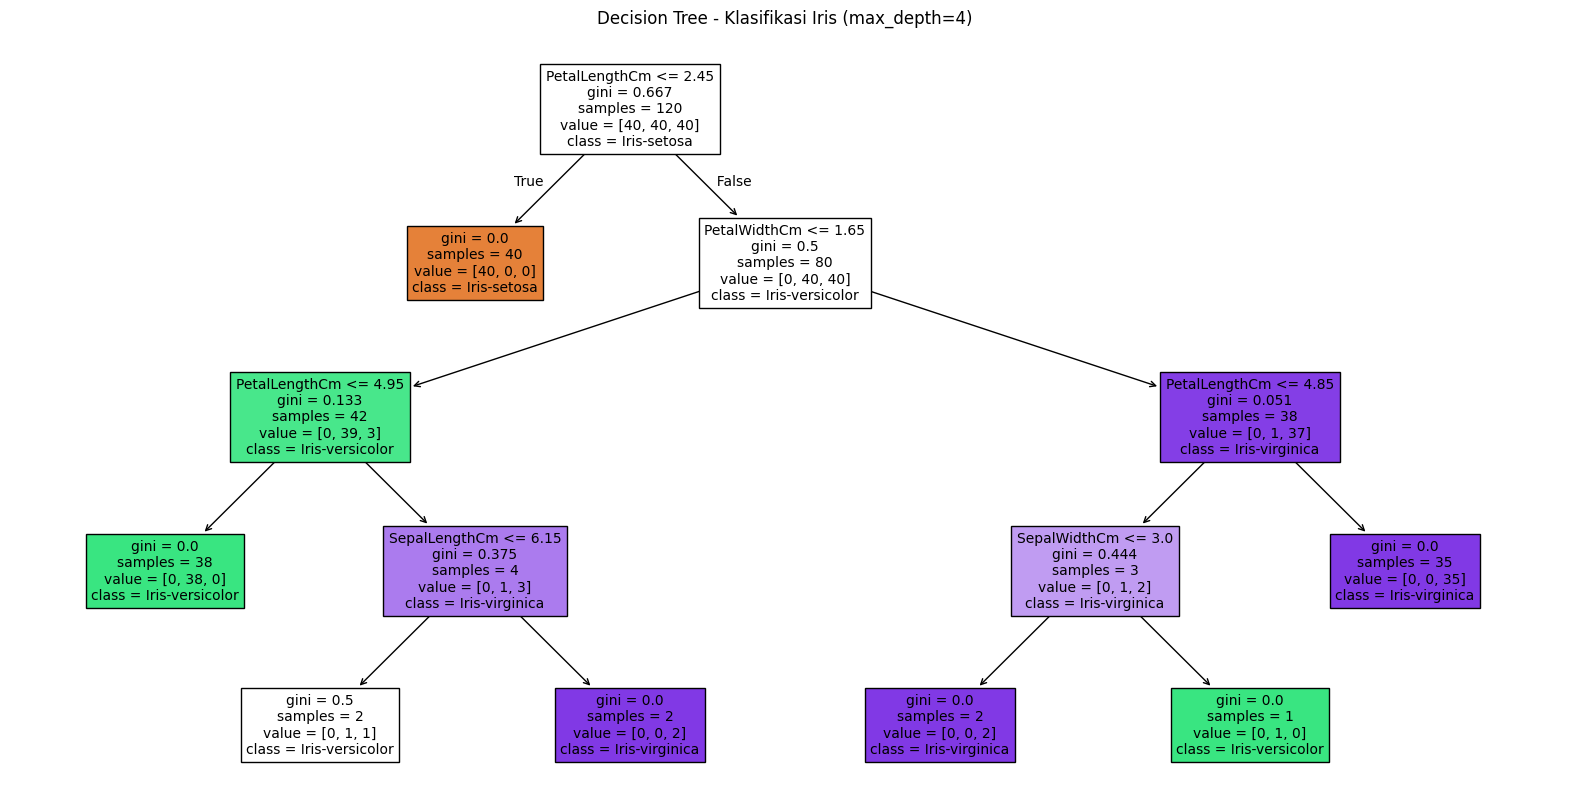

In [13]:
# Visualisasi model
plt.figure(figsize=(20,10)) # Ukuran bisa disesuaikan
plot_tree(
    dt_model_awal,
    feature_names=feature_cols,
    class_names=species_names,
    filled=True,
    fontsize=10
)
plt.title('Decision Tree - Klasifikasi Iris (max_depth=4)')
plt.show()

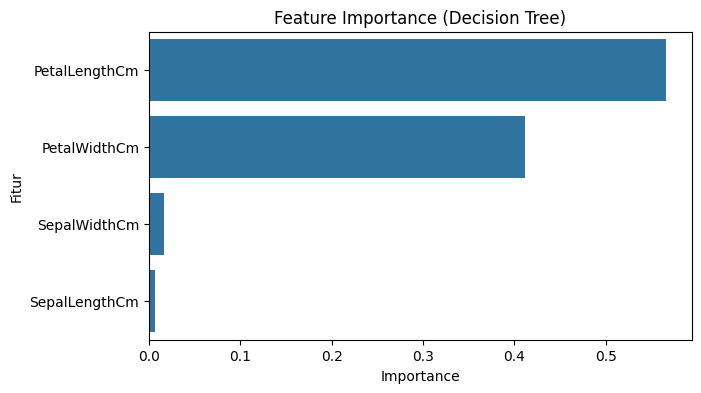


--- Nilai Feature Importance ---
PetalLengthCm    0.565639
PetalWidthCm     0.411154
SepalWidthCm     0.016878
SepalLengthCm    0.006329
dtype: float64


In [14]:
imp = pd.Series(dt_model_awal.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

print("\n--- Nilai Feature Importance ---")
print(imp)

In [16]:
scores = {}
for d in range(2, 9): # Mencoba kedalaman 2 s/d 8
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

print("--- Hasil Tuning max_depth (Akurasi) ---")
print(scores)

best_d = max(scores, key=scores.get)
print(f"\nBest max_depth: {best_d} | Akurasi: {round(scores[best_d] * 100, 2)} %")

--- Hasil Tuning max_depth (Akurasi) ---
{2: 0.9333333333333333, 3: 0.9666666666666667, 4: 0.9333333333333333, 5: 0.9333333333333333, 6: 0.9333333333333333, 7: 0.9333333333333333, 8: 0.9333333333333333}

Best max_depth: 3 | Akurasi: 96.67 %
